In [6]:
import easyocr
import cv2
import csv
import matplotlib.pyplot as plt
import re

In [7]:
image_path = "pic.jpg"
image = cv2.imread(image_path)

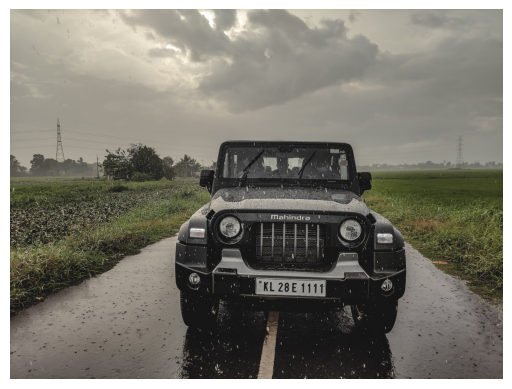

In [8]:
 image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [9]:

def extract_register_number(image_path):
    reader = easyocr.Reader(["en"])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = reader.readtext(image_rgb)
    extracted_numbers = []
    pattern = r'[A-Z]{2}\s?\d{2}\s?[A-Z]{1,2}\s?\d{3,4}'   
    for (_, text, _) in results:
        matches = re.findall(pattern, text)
        for match in matches:
            formatted_number = ''.join(match.split())
            if len(formatted_number) == 10:
                formatted_number = formatted_number[:4] + formatted_number[6:]
            elif len(formatted_number) == 11:
                formatted_number = formatted_number[:4] + formatted_number[7:]
            extracted_numbers.append(formatted_number)
    return extracted_numbers

In [11]:
extracted_text = extract_register_number(image_path)
print(extracted_text)

['KL28E1117']
